In [ ]:

import time
import numpy as np
import cv2
import scipy.special
import matplotlib.pyplot as plt
import os
import csv

from os import listdir
from os.path import isfile, join
import pandas

In [ ]:
def detect_orange(img):
  img = cv2.resize(img,(184,409))

  hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  hsv = cv2.blur(cv2.cvtColor(img,cv2.COLOR_BGR2HSV),(10,10))

  lower_orange = np.array([10,120,120])
  upper_orange = np.array([20,255,255])
  mask1 = cv2.inRange(hsv, lower_orange, upper_orange)
  #cv2.imshow('mask1',mask1)
  white_val = 0
  for row in range(len(mask1)):
      white_val += sum(mask1[row])/255
  return white_val

In [ ]:
def detect_yellow(img):
  img = cv2.resize(img,(184,409))

  hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  hsv = cv2.blur(cv2.cvtColor(img,cv2.COLOR_BGR2HSV),(10,10))

  lower_yellow = np.array([18,120,120])
  upper_yellow = np.array([25,255,255])
  mask1 = cv2.inRange(hsv, lower_yellow, upper_yellow)
  #cv2.imshow('mask1',mask1)
  white_val = 0
  for row in range(len(mask1)):
      white_val += sum(mask1[row])/255
  return white_val

In [ ]:
def detect_green(img):
  img = cv2.resize(img,(184,409))

  hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  hsv = cv2.blur(cv2.cvtColor(img,cv2.COLOR_BGR2HSV),(10,10))

  lower_green = np.array([35,120,120])
  upper_green = np.array([55,255,255])
  mask1 = cv2.inRange(hsv, lower_green, upper_green)
  #cv2.imshow('mask1',mask1)
  white_val = 0
  for row in range(len(mask1)):
      white_val += sum(mask1[row])/255
  return white_val

In [ ]:
# neural network class definition
class neuralNetwork :

    # initialise the neural network
    def __init__(self, inputnodes, outputnodes,learningrate,bias) :

        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        
        self.onodes = outputnodes

        #set weight
        self.w = np.random.normal(0.0, pow(self.onodes, -0.5),(self.onodes, self.inodes))

        # learning rate
        self.lr = learningrate
        self.bias = bias

        # activation function is the sigmoid function
        #self.activation_function = lambda x: scipy.special.expit(x)
        #self.derivative_function = lambda x: 1 if x>0 else 0 if x==0 else -1

        self.dw = 0
        pass
    def activation_function(self,x):
        x_new = np.zeros(x.shape)
        for i in range(len(x)):
          if(x[i]>2500):
            x_new[i] = 1
          else:
            x_new[i] = 0
        return x_new

    # train the neural network
    def train(self, inputs_list, targets_list) :
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        # print('targets = ', targets)

        
        w_dot_input = np.dot(self.w, inputs)
        #print(w_dot_input)
        
        outputs = self.activation_function(w_dot_input+1)
        #print('final_outputs = ', outputs)

        # output layer error is the (target actual)
        output_errors = targets-outputs
        #print('output_errors = ', output_errors)
        
        # update the weights 
        #self.dw = self.lr * np.dot(output_errors,np.transpose(inputs))
        #print(np.multiply( output_errors,self.derivative_function(outputs) ))
        #print(output_errors*self.derivative_function(outputs))
        self.dw = self.lr * np.dot(output_errors,np.transpose(inputs))+(0.9*self.dw)
        self.w += self.dw
        self.bias +=  self.lr *sum(output_errors)
        


        # print("*********")
        pass

    # query the neural network
    def query(self, inputs_list) :

        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T


        output = np.dot(self.w, inputs)

        # calculate the signals emerging 
        final_outputs = self.activation_function(output)

        return final_outputs
    
   
    # def write_weight(self) :
    #     f = open('who.txt','w',encoding='utf-8')
    #     f.write(str(self.who))
    #     f.close()
    #     f = open('wih.txt','w',encoding='utf-8')
    #     f.write(str(self.wih))
    #     f.close()
    #     print('already write!! ')
        

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

!unzip drive/"My Drive"/korat_sauce/train_data_use_color.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  drive/My Drive/korat_sauce/train_data_use_color.zip
   creating: train_data/
  inflating: train_data/maeyupa.0.jpg  
  inflating: train_data/maeyupa.1.jpg  
  inflating: train_data/maeyupa.100.jpg  
  inflating: train_data/maeyupa.101.jpg  
  inflating: train_data/maeyupa.108.jpg  
  inflating: train_data/maeyupa.109.jpg  
  inflating: train_data/maeyupa.110.jpg  
  inflating: train_data/maeyupa.111.jpg  
  inflating: train_data/maeyupa.112.jpg  
  inflating: train_data/maeyupa.113.jpg  
  inflating: train_data/maeyupa.12.jpg  
  inflating: train_data/maeyupa.120.jpg  
  inflating: train_data/maeyupa.121.jpg  
  inflating: train_data/maeyupa.122.jpg  
  inflating: train_data/maeyupa.123.jpg  
  inflating: train_data/maeyupa.124.jpg  
  inflating: train_data/maeyupa.125.jpg  
  inflating: train_data/maeyupa.13.jpg  
  inflating: train_data/maeyupa.13

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

!unzip drive/"My Drive"/korat_sauce/test_data_use_color.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  drive/My Drive/korat_sauce/test_data_use_color.zip
   creating: test_data/
  inflating: test_data/maeyupa.10.jpg  
  inflating: test_data/maeyupa.102.jpg  
  inflating: test_data/maeyupa.103.jpg  
  inflating: test_data/maeyupa.104.jpg  
  inflating: test_data/maeyupa.105.jpg  
  inflating: test_data/maeyupa.106.jpg  
  inflating: test_data/maeyupa.107.jpg  
  inflating: test_data/maeyupa.11.jpg  
  inflating: test_data/maeyupa.114.jpg  
  inflating: test_data/maeyupa.115.jpg  
  inflating: test_data/maeyupa.116.jpg  
  inflating: test_data/maeyupa.117.jpg  
  inflating: test_data/maeyupa.118.jpg  
  inflating: test_data/maeyupa.119.jpg  
  inflating: test_data/maeyupa.126.jpg  
  inflating: test_data/maeyupa.127.jpg  
  inflating: test_data/maeyupa.128.jpg  
  inflating: test_data/maeyupa.129.jpg  
  inflating: test_data/maeyupa.130.jpg  
  inflati

In [ ]:
mypath = 'train_data/'
imagePaths = [mypath+f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
testpath = 'test_data/'
imageTestPaths = [testpath+f for f in listdir(testpath) if isfile(join(testpath, f))]

In [ ]:
train_list = []
train_list_ans = []
test_list = []
test_list_ans = []
for (i, img_path) in enumerate(imagePaths):
      img = cv2.imread(img_path)
      orange_val = detect_orange(img)
      yellow_val = detect_yellow(img)
      green_val = detect_green(img)
      color_list = np.array([orange_val,yellow_val,green_val])
      #train_list.append(np.array([(x-min(color_list))/(max(color_list)-min(color_list))  for x in color_list])+0.01)
      train_list.append(color_list)
      product_name = img_path.split(".")[0].split("/")[1]
      product_class = 0
      if (product_name == "maeyupa"):
          product_class = 1
      elif (product_name == "ocean"):
          product_class = 2
      elif (product_name == "zapnuer"):
          product_class = 3
      elif (product_name == "zapnuerchick"):
          product_class = 4
      
      targets = np.zeros(4) + 0.01
      
      
      targets[product_class-1] = 0.99
      train_list_ans.append(targets)

for (i, img_path_test) in enumerate(imageTestPaths):
      img = cv2.imread(img_path_test)
      orange_val = detect_orange(img)
      yellow_val = detect_yellow(img)
      green_val = detect_green(img)
      color_list = np.array([orange_val,yellow_val,green_val])
      #test_list.append(np.array([(x-min(color_list))/(max(color_list)-min(color_list))  for x in color_list])+0.01) 
      test_list.append(color_list)
      product_name = img_path_test.split(".")[0].split("/")[1]
      product_class = 0
      if (product_name == "maeyupa"):
          product_class = 1
      elif (product_name == "ocean"):
          product_class = 2
      elif (product_name == "zapnuer"):
          product_class = 3
      elif (product_name == "zapnuerchick"):
          product_class = 4

      test_list_ans.append(product_class-1)
              
      
      

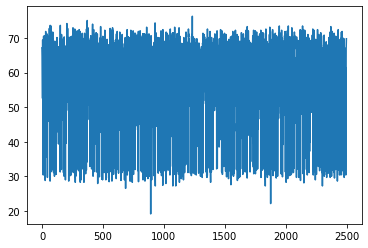

76.27416520210897
1234


In [ ]:

accuracy_each_epochs = []

input_nodes = 3
output_nodes = 4
bias = 1

learning_rate = 0.1


###

n = neuralNetwork(input_nodes,output_nodes,learning_rate,bias)




epochs = 2500
for e in range(epochs):
    
    for i in range(len(train_list)):
        inputs =  train_list[i]        
        targets = train_list_ans[i]
        n.train(inputs, targets)
        pass
    pass

    #test
    
    scorecard = []

    # go through all the records in the test data set
    for  i in range(len(test_list)):
        inputs =  test_list[i]
        ans = test_list_ans[i]
      
               
        outputs = n.query(inputs)
        
        # the index of the highest value corresponds to the label
        label = np.argmax(outputs)
        
        # append correct or incorrect to list
        if (label == ans):
            
            scorecard.append(1)
        else:
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass
        pass
    # calculate the performance score, the fraction of correct answers
    scorecard_array = np.asarray(scorecard)
    #print ("performance = ", scorecard_array.sum() /scorecard_array.size*100)
    accuracy_each_epochs.append(scorecard_array.sum() /scorecard_array.size*100)

plt.plot(np.arange(len(accuracy_each_epochs)),np.array(accuracy_each_epochs)) 
plt.show()
print(max(accuracy_each_epochs))
print(np.argmax(accuracy_each_epochs))

In [ ]:
train_list

[array([7736., 3972.,  181.]),
 array([11289.,   796.,  1524.]),
 array([3603., 2828., 2200.]),
 array([5608., 1903.,  372.]),
 array([ 824.,  382., 2593.]),
 array([11038.,  2433.,  5816.]),
 array([4734., 2901., 1031.]),
 array([20715.,  1521.,  1502.]),
 array([7675., 2111., 5395.]),
 array([998., 873., 430.]),
 array([5537., 2828.,  823.]),
 array([3718., 2386., 1323.]),
 array([7177., 3897.,  191.]),
 array([2168., 1118., 1520.]),
 array([1288.,  599.,  494.]),
 array([5019., 2533.,  870.]),
 array([3356., 2452., 1392.]),
 array([5531., 4012., 3278.]),
 array([3609., 1533., 1154.]),
 array([927., 583., 510.]),
 array([133., 124., 409.]),
 array([1787., 1082.,  629.]),
 array([5054., 2673.,  955.]),
 array([4918., 2579.,  854.]),
 array([6063., 4627., 1724.]),
 array([14180.,  2266.,  3955.]),
 array([5687., 5371.,  240.]),
 array([1901.,  650., 3905.]),
 array([8911., 5163., 1065.]),
 array([2697.,  807., 5650.]),
 array([1680.,  920.,  624.]),
 array([6200., 3773.,  846.]),
 arra

In [ ]:
train_list_ans

[array([0.01, 0.01, 0.01, 0.99]),
 array([0.01, 0.01, 0.99, 0.01]),
 array([0.01, 0.01, 0.01, 0.99]),
 array([0.01, 0.01, 0.01, 0.99]),
 array([0.99, 0.01, 0.01, 0.01]),
 array([0.01, 0.01, 0.99, 0.01]),
 array([0.01, 0.01, 0.01, 0.99]),
 array([0.01, 0.01, 0.99, 0.01]),
 array([0.01, 0.01, 0.99, 0.01]),
 array([0.01, 0.99, 0.01, 0.01]),
 array([0.01, 0.01, 0.01, 0.99]),
 array([0.01, 0.99, 0.01, 0.01]),
 array([0.01, 0.01, 0.01, 0.99]),
 array([0.01, 0.01, 0.99, 0.01]),
 array([0.01, 0.99, 0.01, 0.01]),
 array([0.01, 0.01, 0.01, 0.99]),
 array([0.01, 0.99, 0.01, 0.01]),
 array([0.01, 0.01, 0.01, 0.99]),
 array([0.01, 0.99, 0.01, 0.01]),
 array([0.01, 0.99, 0.01, 0.01]),
 array([0.01, 0.99, 0.01, 0.01]),
 array([0.01, 0.99, 0.01, 0.01]),
 array([0.01, 0.01, 0.01, 0.99]),
 array([0.01, 0.01, 0.01, 0.99]),
 array([0.01, 0.01, 0.01, 0.99]),
 array([0.01, 0.01, 0.99, 0.01]),
 array([0.01, 0.01, 0.01, 0.99]),
 array([0.99, 0.01, 0.01, 0.01]),
 array([0.01, 0.01, 0.01, 0.99]),
 array([0.99, 

Text(0.5, 0, 'b')

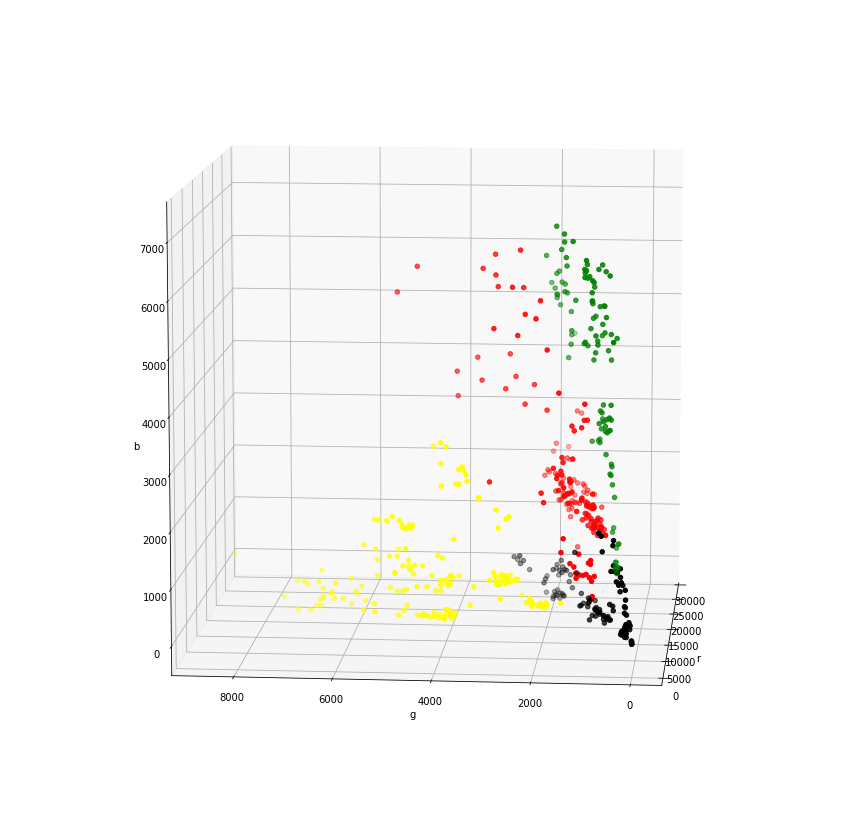

In [ ]:
# xdata = 7 * np.random.random(100)
# ydata = np.sin(xdata) + 0.25 * np.random.random(100)
# zdata = np.cos(xdata) + 0.25 * np.random.random(100)
x1=[]
y1=[]
z1= []
x2=[]
y2=[]
z2= []
x3=[]
y3=[]
z3= []
x4=[]
y4=[]
z4= []
for i in range(len(train_list)):
    if (np.argmax(train_list_ans[i]) == 0):
        x1.append(train_list[i][0])
        y1.append(train_list[i][1])
        z1.append(train_list[i][2])
    elif (np.argmax(train_list_ans[i]) == 1):
        x2.append(train_list[i][0])
        y2.append(train_list[i][1])
        z2.append(train_list[i][2])
    elif (np.argmax(train_list_ans[i]) == 2):
        x3.append(train_list[i][0])
        y3.append(train_list[i][1])
        z3.append(train_list[i][2])
    else:
        x4.append(train_list[i][0])
        y4.append(train_list[i][1])
        z4.append(train_list[i][2])


fig = plt.figure(figsize=(15, 15))
# Create 3D container
ax = plt.axes(projection = '3d')
# Visualize 3D scatter plot
ax.scatter3D(x1,y1,z1,color="g")
ax.scatter3D(x2,y2,z2,color="black")
ax.scatter3D(x3,y3,z3,color="red")
ax.scatter3D(x4,y4,z4,color="yellow")

ax.view_init(10, 185)
# Give labels
ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_zlabel('b')
# Save figure
#plt.savefig('3d_scatter.png', dpi = 300);